<a href="https://colab.research.google.com/github/lomovtsevp/non-linear-dynamic-systems/blob/main/lab7_PZND.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size=5>***Ломовцев Павел ИМБО-01-19***

<font size=5>***Практика 7. Моделирование одномерных точечных отображений***

In [70]:
import scipy.integrate as integr            
import numpy as np                          
import matplotlib.pyplot as plt

stat_dpi=90
dynamics_pics = (6, 3)
rect_pics = (6, 6)

Численное решение

Логистическое дифференциальное уравнение

In [71]:
def logistic(t, x0, r, t0):
    result = 1 / (1 + (1 /x0 - 1) * np.exp(-r * (t - t0)))
    return result

Зависимость логистического уравнения от начальных условий

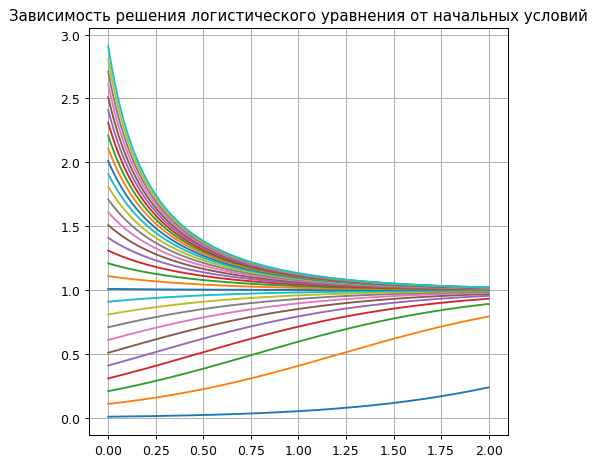

In [72]:
time = np.linspace(0, 2, 5000)

fig = plt.figure(facecolor="white", figsize = rect_pics, dpi=stat_dpi)
plt.title('Зависимость решения логистического уравнения от начальных условий')
for i in np.arange(0.01, 3, 0.1):
  plt.plot(time, logistic(time, i, 1.72, 0))
  plt.grid(True)

Отобржение диаграммы последовательности для дискретного аналога диффура логистического роста.

In [73]:
def log_discret(start, r, n):
  solution = []
  solution.append(start)
  for i in range(n - 1):
    solution.append((1 + r) * solution[i-1] - r * (solution[i-1] ** 2))
  return solution

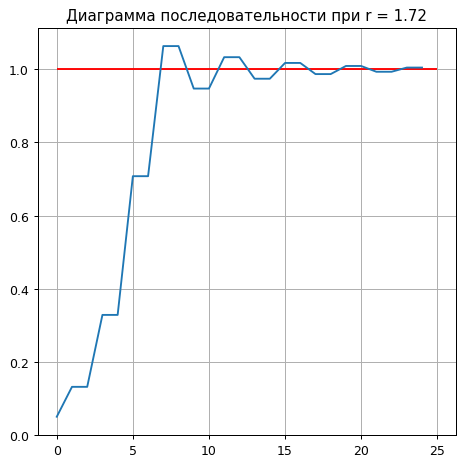

In [74]:
r1 = 1.72 #constants
r2 = 2.32
x0 = 0.05

fig = plt.figure(facecolor="white", figsize = rect_pics, dpi=stat_dpi)
plt.title(f'Диаграмма последовательности при r = {r1}')

time = np.arange(0, 25)

plt.plot(log_discret(x0, r1, len(time)))
plt.grid(True)
plt.hlines(1, 0, len(time),color='red');

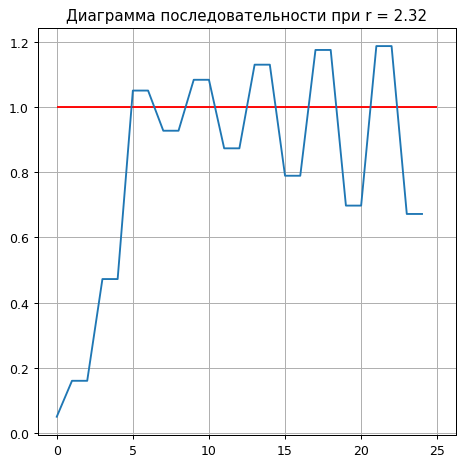

In [75]:
r1 = 1.72 #constants
r2 = 2.32
x0 = 0.05

fig = plt.figure(facecolor="white", figsize = rect_pics, dpi=stat_dpi)
plt.title(f'Диаграмма последовательности при r = {r2}')

time = np.arange(0, 25)

plt.plot(log_discret(x0, r2, len(time)))
plt.grid(True)
plt.hlines(1, 0, len(time),color='red');

Диаграмма Кенигса-Ламерея

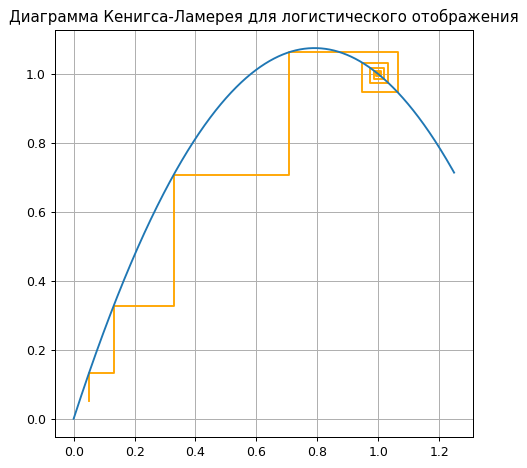

In [76]:
r1 = 1.72 #constants
r2 = 2.32
x0 = 0.05


def log_discret(x, r=1.72):
  return (1 + r) * x - r * (x ** 2)


fig = plt.figure(facecolor="white", figsize = rect_pics, dpi=stat_dpi)

time = np.arange(x0, 100)

x = []
x.append(x0)
y = []
y.append(x0)

for i in time:
  x.append(x[-1])
  y.append(log_discret(x[-1]))
  y.append(log_discret(x[-1]))
  x.append(y[-1])


xs = np.arange(0, 1.25, 0.001)

ys = [log_discret(x) for x in xs]

plt.title("Диаграмма Кенигса-Ламерея для логистического отображения")
plt.plot(x, y, 'orange')
plt.plot(xs, ys)
plt.grid(True);

Диаграмма последования логистического отображения в режиме двукратного цикла

In [77]:
def log_discret_cycl(start, r, n):
  solution = []
  solution.append(start)
  for i in range(n - 1):
    solution.append((1 + r) * ((1 + r) * solution[i - 1] - r * solution[i - 1] ** 2) - r * ((1 + r) * solution[i - 1] - r * solution[i - 1] ** 2) ** 2)
  return solution

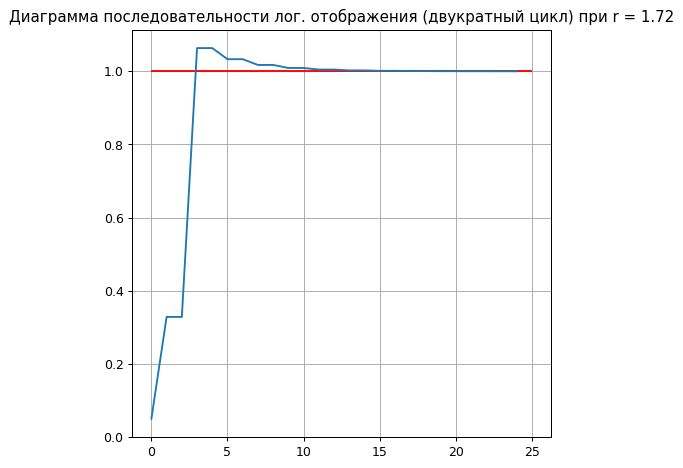

In [78]:
r1 = 1.72 #constants
r2 = 2.32
x0 = 0.05

fig = plt.figure(facecolor="white", figsize = rect_pics, dpi=stat_dpi)
plt.title(f'Диаграмма последовательности лог. отображения (двукратный цикл) при r = {r1}')

time = np.arange(0, 25)

plt.plot(log_discret_cycl(x0, r1, len(time)))
plt.grid(True)
plt.hlines(1, 0, len(time),color='red');

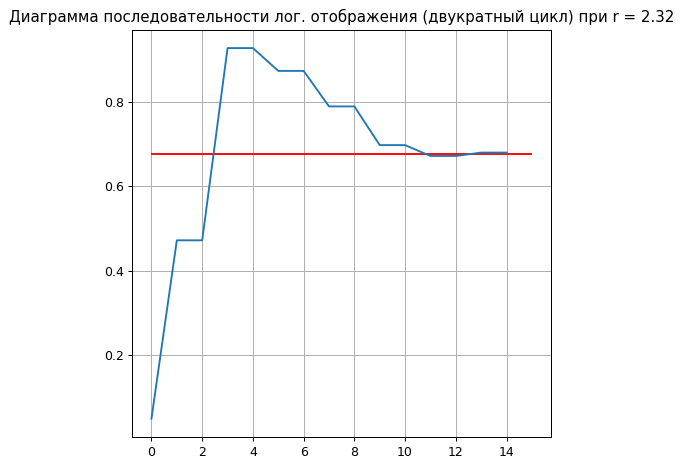

In [79]:
r1 = 1.72 #constants
r2 = 2.32
x0 = 0.05

fig = plt.figure(facecolor="white", figsize = rect_pics, dpi=stat_dpi)
plt.title(f'Диаграмма последовательности лог. отображения (двукратный цикл) при r = {r2}')

time = np.arange(0, 15)

plt.plot(log_discret_cycl(x0, r2, len(time)))
plt.grid(True)
plt.hlines(0.677, 0, len(time),color='red');

Вывод: в логистическом отображении многое зависит от начальных условий и, конечно, от параметра 𝚛

